In [54]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [59]:
#generate basic sequence
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10)) # wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5) # + noise
    return series[..., np.newaxis].astype(np.float32)

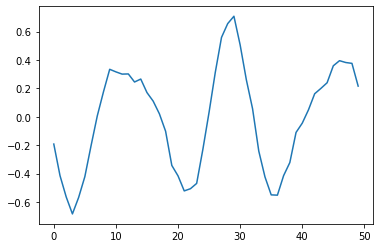

In [64]:
#function call
n_steps = 50
series = generate_time_series(10000, n_steps) # shape - [batch size, time steps, 1] ... 1 because univariate data (just one datapoint)
plt.plot(x_train[0])

ValueError: too many values to unpack (expected 2)

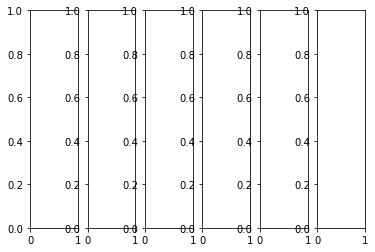

In [68]:
#plot the first 5 series
fig, (ax1, ax2, ax3, ax4, x5) = plt.subplots(1, 6)
fig.suptitle('Horizontally stacked subplots')
ax1.plot(x_train[0])
ax2.plot(x_train[1])
ax3.plot(x_train[2])
ax4.plot(x_train[3])
ax2.plot(x_train[4])

In [61]:
#split the data
x_train = series[:7000]
y_train = series[:7000, -1]
x_valid = series[7000:9000]
y_valid = series[7000:9000, -1]
x_test = series[9000:]
y_test = series[9000:, -1]

In [62]:
#shape of data
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)
print(x_test.shape)
print(y_test.shape)

(7000, 50, 1)
(7000, 1)
(2000, 50, 1)
(2000, 1)
(1000, 50, 1)
(1000, 1)
